In [35]:
import numpy as np

In [36]:
fish_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
fish_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [37]:
# Train, Test 분리
from sklearn.model_selection import train_test_split

In [38]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_length, fish_weight, random_state=42
)

In [39]:
train_input.shape

(42,)

In [40]:
train_input = train_input.reshape(-1,1)

In [41]:
train_input.shape

(42, 1)

In [42]:
test_input = test_input.reshape(-1, 1)

In [43]:
test_input.shape

(14, 1)

In [44]:
from sklearn.neighbors import KNeighborsRegressor

In [54]:
knr = KNeighborsRegressor(n_neighbors=3).fit(train_input, train_target)

---
### 길이가 50cm인 생선의 무게를 예측

In [55]:
pred = knr.predict([[50]])

In [56]:
pred

array([1033.33333333])

### 기존 데이터로 무게 확인

In [57]:
train_target.max()

1100.0

In [58]:
train_input.max()

44.0

### 산점도로 이웃을 구해서 확인해보자

In [59]:
import matplotlib.pyplot as plt

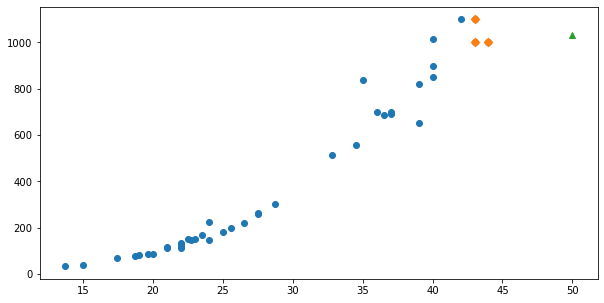

In [61]:
# 50cm 이웃을 구하자
distance, indexes = knr.kneighbors([[50]])

# 훈련셋의 산점도를 그리기
plt.figure(figsize=(10,5))
plt.scatter(train_input, train_target)

# 이웃 샘플 그리기
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
plt.scatter(50, 1033, marker='^')

plt.show()

In [64]:
# ???
knr.predict([[100]])

array([1033.33333333])

> 최대값을 벗어나는 값은 예측할 수 없다..

---
### 선형회귀(linear regression)
: 직선이나 곡선의 함수식(Y=aX + b)을 이용하여 구하는 방식으로, 로지스틱 회귀분석이나 인공신경망의 기초가 되었다.

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
lr = LinearRegression().fit(train_input, train_target)

In [67]:
lr.predict([[50]])

array([1241.83860323])

In [68]:
# Y = aX + b 에서 기울기와 절편을 출력 : Deep Learning에서는 Weight와 Bias로 불림
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


> coef_ : 기울기, intercept_ : y절편

In [69]:
39.01714496 * 50 + -709.0186449535477

1241.8386030464526

### 산점도 그려보기

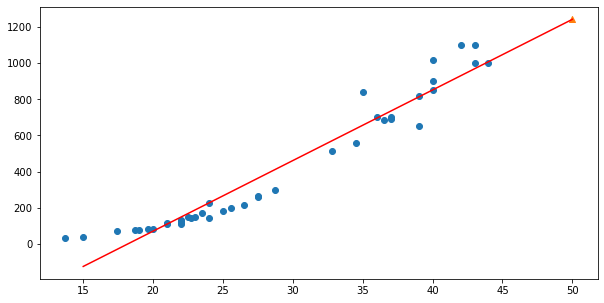

(None,)

In [72]:
# 훈련셋의 산점도를 그리기
plt.figure(figsize=(10,5))
plt.scatter(train_input, train_target)

# length 15~50 1차 방정식 그래프 그리기
plt.plot(
    [15,50],
    [15*lr.coef_ + lr.intercept_, 50*lr.coef_ + lr.intercept_],
    c='red'
)
# 50cm 생선 데이터
plt.scatter(50, 1241.8, marker='^')

plt.show(),

> 산점도의 회귀선을 보니 길이가 작아지면 무게가 음수가 발생한다.   
> y 절편이 음수이다.

In [73]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


> 과대적합

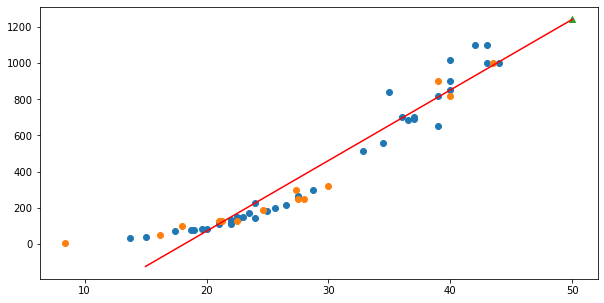

In [75]:
# 훈련셋의 산점도를 그리기
plt.figure(figsize=(10,5))
plt.scatter(train_input, train_target)
plt.scatter(test_input, test_target)

# length 15~50 1차 방정식 그래프 그리기
plt.plot(
    [15,50],
    [15*lr.coef_ + lr.intercept_, 50*lr.coef_ + lr.intercept_],
    c='red'
)
# 50cm 생선 데이터
plt.scatter(50, 1241.8, marker='^')

plt.show()

> 다항회귀식을 써보자 : 선이 곡선이 된다.   
> train, test 셋이 같이 움직이므로 쓰기 좋아보인다.

---
### 다항회귀식
$Y = aX^2+bX+C$
- 항이 여러개 있고 Feature가 하나인 것을 의미
- Feature가 여러개인 회귀는 '다중회귀'라고 한다.

In [78]:
# Feature 제곱한 Column을 생성하여 기존의 Column에 붙인다.
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

In [80]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


> 열이 2개가 되었다!!

In [81]:
lr = LinearRegression().fit(train_poly, train_target)

In [82]:
# 50cm 생선에 대한 예측(기존 1241.8) 
lr.predict([[50**2, 50]])

array([1573.98423528])

> train_poly의 항이 2개이니깐 형식에 맞게

In [83]:
# 기울기와 절편
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278259


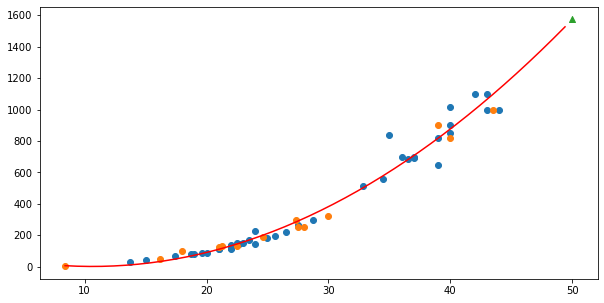

In [91]:
# 구간별 직선을 그리기 위해 15~49의 정수 배열 만들기
point = np.arange(fish_length.min(),50)

# train_poly 산점도를 그리기
plt.figure(figsize=(10,5))
plt.scatter(train_input, train_target)
plt.scatter(test_input, test_target)

# length 15~50 1차 방정식 그래프 그리기
plt.plot(
    point,
    1.01433211 * point ** 2 -21.55792498 * point + 116.05021078278259,
    c='red'
)
# 50cm 생선 데이터
plt.scatter(50, 1573.98423528, marker='^')

plt.show()

In [92]:
# 과대적합과 과소적합
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325121


> 약간의 과소적합이 발생하지만 단순회귀보다는 다항회귀가 적합하다